### Data science and Business Analytics (GRIP August 2021)

### Task 1 : Predction using Linear Regression

### Author : Karan Khatri

### prediction statment : Predict the percentage of an student based on the no. of study hours.

#### Importing required libraries

In [27]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##### Reading data from remote link

In [28]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print('Data imported successfully')


data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### shape of dataset

In [29]:
data.shape

(25, 2)

#### Dataset info

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Average values

In [31]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


####  Plotting the distribution of scores

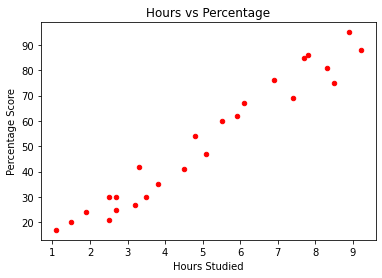

In [32]:
data.plot(x='Hours', y='Scores', style='o',kind='scatter',color='red')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

plt.show()

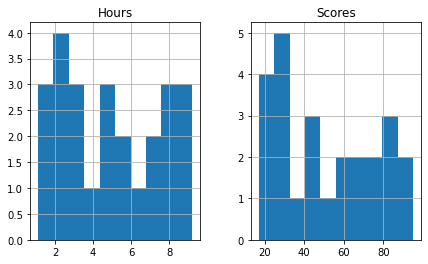

In [33]:
data.hist(figsize=(7,4))
plt.show()

#### heatmap ~ correlation

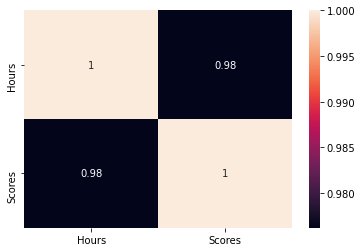

In [35]:
corr = data.corr()

sns.heatmap(corr,annot=True)
plt.show()

#### Barplot ~ Hours vs Scores

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

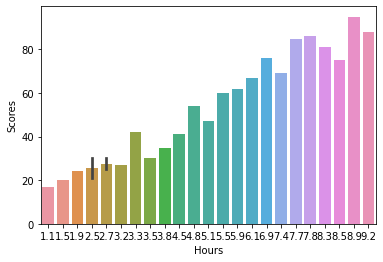

In [36]:
sns.barplot(x='Hours', y='Scores',data=data)

#### preparing the data 

In [37]:
X = data.iloc[:,:-1].values
y = data.iloc[:, 1].values    

#### Now that we have our attributes and labels, the next step is to split this data into training and test sets

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

#### Training the Algorithm

In [39]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("-----Model Trained-----")

-----Model Trained-----


#### plotting the regression line

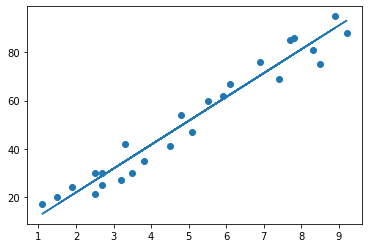

In [40]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [41]:
# finding correlation

print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


#### Making prediction 

In [42]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


####  Comparing Actual vs Predicted

In [43]:
df = pd.DataFrame({'hours': y_test, 'Predicted_score': y_pred})  
df

,hours,Predicted_score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### prediction of score for 9.25 hours per day

In [44]:
hours = [9.25]
own_pred = regressor.predict([hours])

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737538


#### Evaluating the model 

In [45]:
 from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
